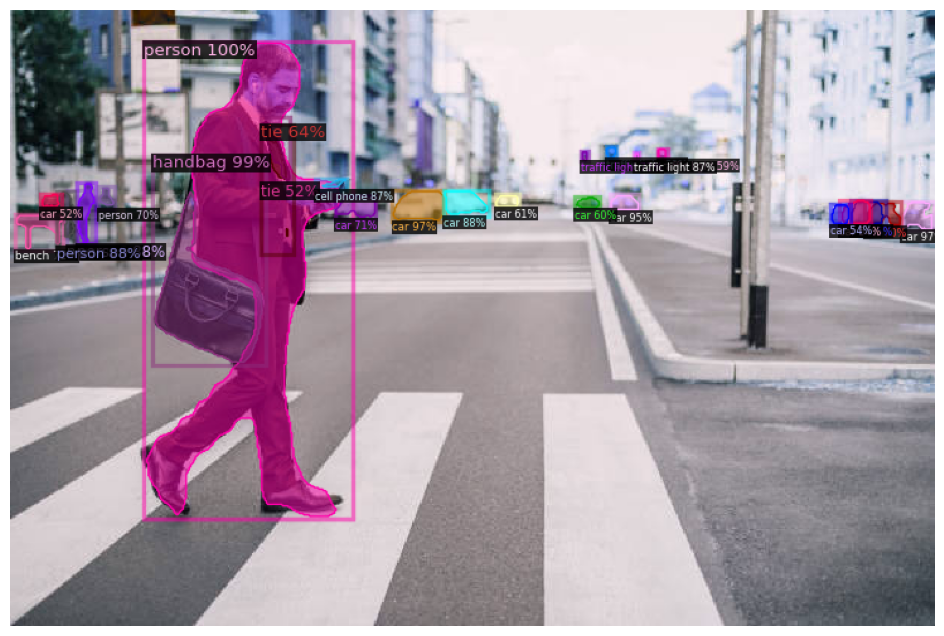

In [14]:
# el pretrained model mt3 detetcron2 ma3moulou train 3ala coco dataset w b 80 classes fel output : Person,Bicycle,Car,Motorcycle,Airplane,Bus,Train,Truck,Boat,Traffic light,Fire hydrant,Stop sign,Parking meter,Bench,Bird,Cat,Dog,Horse,Sheep,Cow,Elephant,Bear,Zebra,Giraffe,Backpack,Umbrella , Handbag,Tie,Suitcase,Frisbee,Skis,Snowboard,Sports ball,Kite,Baseball bat,Baseball glove,Skateboard,Surfboard,Tennis racket,Bottle,Wine glass,Cup,Fork,Knife,SpoonBowl,Banana,Apple,Sandwich,Orange,Broccoli,Carrot,Hot dog,Pizza,Donut,Cake,Chair,Couch,Potted plant,Bed,Dining table,Toilet,TV,Laptop,Mouse,Remote,Keyboard,Cell phone,Microwave,Oven,Toaster,Sink,Refrigerator,Book,Clock,Vase,Scissors,Teddy bear,Hair drier,Toothbrush


#import mt3 el bib eli bech na7tejouhom
import torch
import os
import cv2
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

os.chdir(r"C:\Users\toumi\OneDrive\Bureau\rr") # nbadlou el dir win mawjouda el data mte3na

image_path = r"immg.jpg" # njibou el taswira eli bech na3mlou 3leha el predict
img = cv2.imread(image_path) # na9raw kel taswira 

#na3mlou configuration ll model mte3na 
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")) # nesta3mlou el model eli 3amel train 3al coco dataset
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # n7otou threshold ll prediction mte3na
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml") # nlodiou el weights mt3 el model
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # n9oloulou esta3mel el GPU ken 3anech GPU esta3mel el CPU

predictor = DefaultPredictor(cfg) # njibou kel predictor mte3na bel cfg eli 7atinehom

outputs = predictor(img) # na3mlou predict 3al taswira mte3na
    
# bech norsmou el taswira eli 3malna 3leha el predict
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)       
out=v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
# nbadlou el taswira men BGR ll RGB bech enajmou nesta3mlou matplotlib
output_image = out.get_image()[:, :, ::-1]
    
# n7otou el size mte3na w norsmou
plt.figure(figsize=(12, 8))
plt.imshow(output_image)
plt.axis("off")
plt.show()


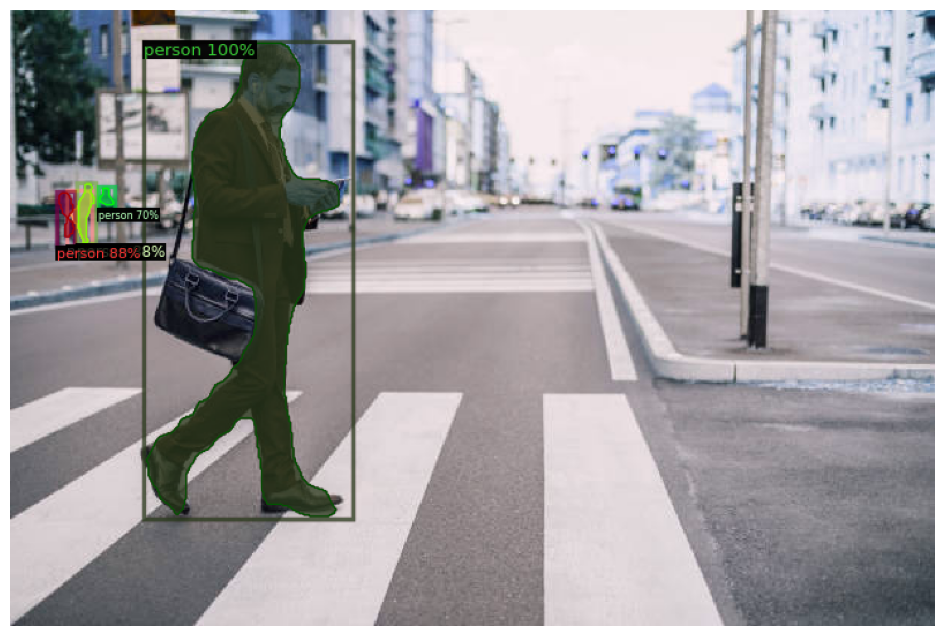

In [43]:
# ken t7eb torsem el resultat ken 3al classe eli t7eb 3lih ( lena 5tarna ken el person )
target_classes=[0] # index el classe person houa 0 ( 7ot index el classe eli t7eb 3lih )
pred_classes = outputs["instances"].pred_classes  # 3malna access ll pred_class eli mawjouda fel outputs["instances"]
mask = torch.isin(pred_classes, torch.tensor(target_classes))  # esta3malna function fi pytorch bech nlawjou 3al person fel prediction mte3na
filtered_instances = outputs["instances"][mask] # 3malna kel mask na7na el classes el kol fel prediction ken class el person 
out=v.draw_instance_predictions(filtered_instances.to("cpu")) # norsmou rasmetna 3an tri9 el CPU
    
# nbadlou el taswira men BGR ll RGB bech enajmou nesta3mlou matplotlib
output_image = out.get_image()[:, :, ::-1]
    
# n7otou el size mte3na w norsmou
plt.figure(figsize=(12, 8))
plt.imshow(output_image)
plt.axis("off")
plt.show()